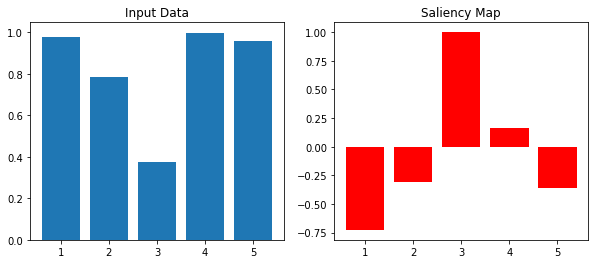

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple tabular dataset
# Replace this with your own dataset
# Assume X_train is your feature matrix and y_train is your target variable
X_train = np.random.rand(100, 5)  # 100 samples, 5 features
y_train = np.random.randint(2, size=(100,))

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, verbose=0)

# Choose a sample from the training set
sample_idx = 0
input_data = X_train[sample_idx:sample_idx + 1]

# Convert the NumPy array to a TensorFlow variable
input_tensor = tf.Variable(input_data, dtype=tf.float32)

# Record operations for automatic differentiation using tf.GradientTape
with tf.GradientTape() as tape:
    # Get the model's prediction for the input data
    preds = model(input_tensor)
    # Get the output score (e.g., for binary classification)
    score = preds[0, 0]

# Compute the gradient of the score with respect to the input data
grads = tape.gradient(score, input_tensor)

# Normalize the gradients
grads /= tf.reduce_max(grads)

# Convert the TensorFlow tensor to a NumPy array
grads = grads.numpy()

# Plot the original data and the saliency map
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), input_data.flatten())
plt.title('Input Data')
plt.subplot(1, 2, 2)
plt.bar(range(1, 6), grads.flatten(), color='red')
plt.title('Saliency Map')
plt.show()